# «Portfolio-Exam Part I» MADS-ML

This is the ﬁrst part of the portfolio-exam for the Data Science course MADS-ML (Machine Learning). <br>
This part of the exam is homework. Student’s are allowed to exchange ideas. However, this is NOT a <br>
teamwork exercise. Every student must derive and write up their own solutions in their own words <br>
and programming style. <br>
To complete this ﬁrst part of the exam, <br>
• solve ALL the following tasks (two pages!), <br>
• create a commented Jupyter Notebook for the code as well as for your textual answers, and <br>
• upload the ﬁle to Moodle before 23:59 o’clock (German time) December 12th, 2021. <br>
Note: In the Notebook, please state clearly which task a piece of code or text belongs to. Some of the <br>
tasks are not strictly separable, e.g. setting up the cross validation and using it on the algorithms. <br>
In these cases, just indicate in the notebook, which tasks the respective piece of code addresses.

# Exercise 1. (Random Forest, 20 points)
Research: Read up on the algorithm Random Forest [1]. You may select a reliable source of your
choice for that purpose.  <br> You should be able to explain the basic idea of the algorithm and understand
the application of the implementation in sklearn.

## 1.1 (10 points) Describe the relation between Random Forests and Decision Trees (for classiﬁcation).

The Random Forest algorithm is part of the ensemble methods. Ensemble learning describes a process that uses a set of classifiers and their predictions are aggregated to find the best result. Random Forest uses a set of decision trees as classifier. The decision trees in the Random Forest classifier are using not the full training data, instead there use a subset. This subsets are created to the techniquie of Bootstrap Aggregation (Bagging). The Bagging method takes a random sample of the data with replacement and this are then the subsets for every decision tree. In this case means replacement that the individual data point can be choosen more than one time. The size of the random sample is controlled in sklearn thorugh the max_samples parameter. The dafault value is the size of the full training set. If we sampling from the existing dataset the chance that the subsets of the decision trees are all very similar and contain the same features is high. To avoid this issues the Random Forest algorithm uses a parmeter to do "random splitting". In sklearn this parameter is max_feature. This parameter defines the amount of feature to condsider for the best split. In classification the default value in sklearn equals max_feature the square root of all avavailable features. This has been empirical shown the best results. In this way each decision tree isn't perfect designed but the amount of different decision trees are more various and not so much correlated. In comparison to decision trees all feature are considered for the best split. <br>
The last step of the Random Forest algorithm is the that each decision tree predict a class and the class with most votes is the result. The prediction is the average of all decision trees. The main differnces between dicision trees and Random forest are the ensemble method and the Bootstrap Aggregation. Instead of using the original dataset, the Random forest classifier uses random subsets for the amount of decision trees in the algorithm. The way to do predictions is also different because the random forest algotihm takes result which has the most votes from decision trees, instead using the best score of one decision tree, like a normal decision tree.

## 1.2. (6 points) Compare the Random Forest and the Decision Tree classiﬁer in sklearn by discussing  <br> the parameters n_estimators, criterion, and max_depth. Explain what the parameters control and why <br>  they are applicable to both algorithms or just the one.
 

The parameter criterion decribes the function how to split the decision tree. Like we discussed in the lecture we can choose between the default paramter gini or entropie. The random forest and the decision tree using both this parameter because they need to to know how to split their decision tree. The random forest exists of multiple decision tree that's the reason why it needs this parameter. <br> 
The paramter max_deph decribes the depth of a decision tree. The default value is none that means thats the leaves will be expand until they are pure or until all leaves contain less than the parameter min_samples_split. Both algorithm needs this parameter because the decision tree needs this infortmation and the random forest exists out of decision trees. <br> 
Only the parameter n_estimators is used only in the Random forest algorithm. This parameter decribes the amount of decision trees which are used in the Random Forest algorithm. The Decsion tree doesn't need this information because it only one decision tree.

## 1.3 (4 points) Compare the two algorithms with respect to their application:   <br> Which are immediate advantages and disadvantages of Random Forest over Decision Trees?

Decision trees are easy to interpret and good to visulazie. The decisions of random forest are not so easy to interpret when there are contains 100 of decision trees. 

# Exercise 2. (Data Acquisition, 10 Points)
Find and download the dataset “Online Shoppers Purchasing Intention” [2]. Use the dataset to tackle
to following question: Given a user’s browsing behavior during a session in a web system as well as  <br>
some other features of that session, predict whether the user will buy something (indicated in the
column revenue by true or false). Load the dataset in python and answer the following questions:

## 2.1. (5 points) How many numerical features can we use for predicting whether revenue is true or false.

Load libaries

In [25]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, tree
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix
import sklearn.metrics as ms
import matplotlib.pyplot as plt

Load data

In [3]:
df = pd.read_csv("online_shoppers_intention.csv", sep= ",")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


The dataset contains 10 numerical and 8 catogorical features. Following features are numerical: Administrative_Duration, Informational_Duration, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay,

## 2.2 (5 points) Describe and comment on the class distribution in the dataset.

This dataset contains 12.330 instances. The revenue false have 10.422 instances and revenue true have 1908 instances. If revenue equals true then this instances ends with shopping, if revenue was false then this instances without buying something. The distribution is imbalanced that can lead to high accuracy even we miss all elements of the small classes. The problem is when we splitt the dataset that the subsets have a different distribution. The solution is Stratifcation where we enforce the same class distribtion.

In [4]:
distribution = df["Revenue"].value_counts()
print(distribution[0])
distribution[0].dtype
print("The dataset contains:"+ str(df.shape[0]) + " samples of online shopping. The revenue negative is "+ str(round(distribution[0]/df.shape[0]*100,2)) + "% and the revenue positive is "+ str(round(distribution[1]/df.shape[0]*100,2)) + "%.")

10422
The dataset contains:12330 samples of online shopping. The revenue negative is 84.53% and the revenue positive is 15.47%.


## Exercise 3. (Machine Learning Setup – 15 points) <br>
Setup a machine learning experiment by <br>

• splitting the target attribute from the data, converting it into a form suitable for sklearn <br>
classiﬁers and preparing the numerical attributes as features, <br>

• selecting 30% of the data as test data (choose random seed 42), <br>

• scaling the data such that the features have similar average and standard distribution.

In [5]:
y = df["Revenue"]
X = df[["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues", "SpecialDay"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
scaler1 = preprocessing.StandardScaler().fit(X_train)
X_train_sc = scaler1.transform(X_train)
scaler2 = preprocessing.StandardScaler().fit(X_test)
X_test_sc = scaler2.transform(X_test)


split target Revenue in y, add numerical feature in x, divide dataseit in train and test data, and use the standardscaler to scale X_train to have similar averages and standard distribution

## Exercise 4. (Cross Validation – 17 points) <br>
Use a combination of the classes GridSearchCVand RepeatedStratifiedKFoldto setup <br>
a cross validation procedure for hyper parameter optimization.

## 4.1 (5 points) Create a cross validation setting in which the data is split into 10 folds, where all experiments are repeated 10 times, and where algorithms are evaluated using balanced accuracy.

In [6]:
def cross_validate_setting(X,y,model, params):    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
    clf = GridSearchCV(model, params, scoring='balanced_accuracy', cv=cv)
    search = clf.fit(X,y)
    return search.best_params_



## 4.2 (2 points) Which dataset is used in the grid search cross validation (training data, test data, or full dataset)?

I use the full dataset and fold it into 10 subsets.

## 4.3 (3 points) Explain, what happens to that dataset during the grid search procedure!

The Gridsearch takes the model, the hyperparameter(params), the scoring type, the splitted dataset(cv) as input. The dataset is devided into 10 subsets. The GridSearch takes all inputs and builds a grid of it with all information. When we run the command fit. It runs all combinations of the grid and the command best_params_ shows us the hyperparmeter with the best balanced accurancy.

## 4.4. (5 points) What is the difference between using RepeatedStratifiedKFold and the default cross validation in GridSearchCV?

## 4.5 (2 points) Explain the purpose that justiﬁes repeating experiments on the same dataset and on different folds.

The result of doing the experiment just ones can lead to outliers and different results. Repeated experiments take every result and calculate the mean that leads to more accurate results.

## Exercise 5. (Evaluation of Classiﬁers – 10 points)
Use the above cross validation setup to optimize and compare tree based learners. Use

## 1. (5 points) Decision Trees with the Gini criterion and test parameters 2 through 14 for max_depth.

The best score for a Decision tree is with max depth of 3.

In [7]:
clf = tree.DecisionTreeClassifier(criterion='gini')
max_depth_range = list(range(2,15))
hyperparameter = {"max_depth": max_depth_range}
score = cross_validate_setting(X,y,clf,hyperparameter)
print(score)

{'max_depth': 3}


## 5.2 (5 points) Random Forests with 1, 10, or 100 trees and 2,3,5, or 10 for max_depth.

The best score for a Randomforest is with max depth of 10 and 100 trees

In [8]:
clf = RandomForestClassifier()
hyperparameter = {"max_depth": [2,3,5,10], "n_estimators": [1,10,100]}
score = cross_validate_setting(X,y,clf,hyperparameter)
print(score)

{'max_depth': 10, 'n_estimators': 100}


## Exercise 6. (Oversampling – 8 points)
Use oversampling to create a balanced training dataset. Look at the class
imblearn.over_sampling.RandomOverSamplerfor that purpose.

## 6.1 (2 points) What does the above class do?

This class oversample the minority class by picking samples at random with replacement.

## 6.2 (3 points) Why is oversampling only applied to the training dataset (not to the test data)?

The intent is to create a better model. Otherwise the evaluation of test data is showing wrong results. 

## 6.3 (3 points) Optimize Random Forest with the same search grid as before, but trained on a balanced training dataset.

In [9]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train_sc, y_train)
clf = RandomForestClassifier()
hyperparameter = {"max_depth": [2,3,5,10], "n_estimators": [1,10,100]}
score = cross_validate_setting(X_res,y_res,clf,hyperparameter)
print(score)

{'max_depth': 10, 'n_estimators': 100}


In [10]:

print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({False: 7298, True: 7298})


Now both cases (positive, ngeative) are balenced. The hyperparamter number of trees has change to 10 but the depth is the same like without a balanced data set (max_depth = 10).

## Exercise 7. (Interpretation – 20 points)
Evaluate the resulting three algorithms of the three above cross validation experiments (Decision
Tree and two versions of Random Forest).

## 7.1 (2 points) Prepare a data frame in which the evaluation results of algorithms can be stored with columns for the algorithm, accuracy, balanced accuracy, confusion matrix and the best hyperparameters of the algorithm.

In [11]:
evaluation_df = pd.DataFrame({'algorithm':[], 'accuracy':[],'balanced accuracy':[], 'confusion matrix':[],'best hyperparameters':[]})

## 7.2 (2 points) On which dataset should the performance of algorithms (with already optimized hyper parameters) be compared (training data, test data, full data)?

The performance needs to be compared with test data. Otherwise we could have overfitting and the algorithms are only working for the optimized training data.

## 7.3 (6 points) For each algorithm report the best choice of hyperparameters found using the above cross validations.

Decision tree algorithm

In [12]:
clf = tree.DecisionTreeClassifier(criterion='gini')
max_depth_range = list(range(2,15))
hyperparameter = {"max_depth": max_depth_range}
score_decision_tree = cross_validate_setting(X,y,clf,hyperparameter)
print(score_decision_tree)

{'max_depth': 3}


In [13]:
evaluation_df = evaluation_df.append(pd.DataFrame({'algorithm':['Decision tree'], 'best hyperparameters':[score_decision_tree]}),ignore_index=True)

RandomForest algorithm

In [14]:
clf = RandomForestClassifier()
hyperparameter = {"max_depth": [2,3,5,10], "n_estimators": [1,10,100]}
score_random_forest = cross_validate_setting(X,y,clf,hyperparameter)
print(score_random_forest)

{'max_depth': 10, 'n_estimators': 100}


In [15]:
evaluation_df = evaluation_df.append(pd.DataFrame({'algorithm':['RandomForest'], 'best hyperparameters':[score_random_forest]}),ignore_index=True)

balanced RandomForest algorithm

In [16]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train_sc, y_train)
clf = RandomForestClassifier()
hyperparameter = {"max_depth": [2,3,5,10], "n_estimators": [1,10,100]}
score_balanced_random_forest = cross_validate_setting(X_res,y_res,clf,hyperparameter)
print(score_balanced_random_forest)

{'max_depth': 10, 'n_estimators': 100}


Add best hyperparamters in evaluation dataframe

In [17]:
evaluation_df = evaluation_df.append(pd.DataFrame({'algorithm':['balanced RandomForest'], 'best hyperparameters':[score_balanced_random_forest]}),ignore_index=True)


In [18]:
evaluation_df

,algorithm,accuracy,balanced accuracy,confusion matrix,best hyperparameters
0,Decision tree,NaN,NaN,NaN,{'max_depth': 3}
1,RandomForest,NaN,NaN,NaN,"{'max_depth': 10, 'n_estimators': 100}"
2,balanced RandomForest,NaN,NaN,NaN,"{'max_depth': 10, 'n_estimators': 100}"


## 7.4 (6 points) Compare three classiﬁers regarding both accuracy and balanced accuracy. Recommend a setting for use in production.

General function to create the accuracy score and a function to calculate the balanced_accuracy_score

In [57]:
def calc_accuracy_score(model,x_train,y_train,x_test,y_test):
    model.fit(x_train, y_train)
    y_test_pred = model.predict(x_test)
    print(accuracy_score(y_test, y_test_pred))
    return accuracy_score(y_test, y_test_pred)

In [59]:
def calc_balanced_accuracy_score(model,x_train,y_train,x_test,y_test):
    model.fit(x_train, y_train)
    y_test_pred = model.predict(x_test)
    print(balanced_accuracy_score(y_test, y_test_pred))
    return balanced_accuracy_score(y_test, y_test_pred)

Decision tree

In [58]:
model = tree.DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=3)
evaluation_df.iloc[0,1] = calc_accuracy_score(model,X_train_sc, y_train, X_test_sc, y_test)

0.8834820221681535


In [60]:
model = tree.DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=3)
evaluation_df.iloc[0,2] = calc_balanced_accuracy_score(model,X_train_sc, y_train, X_test_sc, y_test)

0.7515108834827144


Random forest

In [61]:
model = RandomForestClassifier(criterion='gini', random_state=1, max_depth=10,n_estimators=100)
evaluation_df.iloc[1,1] = calc_accuracy_score(model,X_train_sc, y_train, X_test_sc, y_test)

0.8932143822654771


In [62]:
model = RandomForestClassifier(criterion='gini', random_state=1, max_depth=10,n_estimators=100)
evaluation_df.iloc[1,2] = calc_balanced_accuracy_score(model,X_train_sc, y_train, X_test_sc, y_test)

0.7459205032566943


balanced random forest

In [63]:
model = RandomForestClassifier(criterion='gini', random_state=1, max_depth=10,n_estimators=100)
evaluation_df.iloc[2,1] = calc_accuracy_score(model,X_res, y_res, X_test_sc, y_test)

0.8759124087591241


In [64]:
model = RandomForestClassifier(criterion='gini', random_state=1, max_depth=10,n_estimators=100)
evaluation_df.iloc[2,2] = calc_balanced_accuracy_score(model,X_res, y_res, X_test_sc, y_test)

0.8392662695540833


add values into evualtion dataframe

In [70]:
evaluation_df

,algorithm,accuracy,balanced accuracy,confusion matrix,best hyperparameters
0,Decision tree,0.883482,0.751511,"[[2946, 178], [253, 322]]",{'max_depth': 3}
1,RandomForest,0.893214,0.745921,"[[2998, 126], [269, 306]]","{'max_depth': 10, 'n_estimators': 100}"
2,balanced RandomForest,0.875912,0.839266,"[[2788, 336], [123, 452]]","{'max_depth': 10, 'n_estimators': 100}"


## 7.5 (4 points) Explain differences in the values of the two quality measures using confusion matrixes.

In [56]:
def plot_confusion(y_test,y_pred,y_test_2,y_pred_2):
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
        ms.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axes[0])
        ms.ConfusionMatrixDisplay.from_predictions(y_test_2, y_pred_2, ax=axes[1])
       

Add confusion matrix to evaluation dataframe

[[2946  178]
 [ 253  322]]


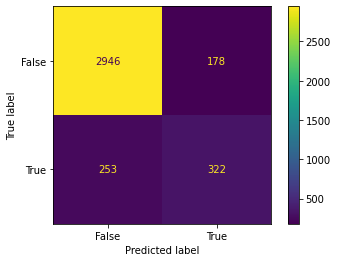

In [54]:
clf = tree.DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=3)
clf.fit(X_train_sc, y_train)
y_test_pred = clf.predict(X_test_sc)
print(confusion_matrix(y_test, y_test_pred))

plot_confusion(y_test,y_test_pred)
evaluation_df.iloc[0,3] = [confusion_matrix(y_test, y_test_pred)]

In [67]:
clf = RandomForestClassifier(criterion='gini', random_state=1, max_depth=10,n_estimators=100)
clf.fit(X_train_sc, y_train)
y_test_pred = clf.predict(X_test_sc)
print(confusion_matrix(y_test, y_test_pred))
evaluation_df.iloc[1,3] = [confusion_matrix(y_test, y_test_pred)]

[[2998  126]
 [ 269  306]]


In [69]:
clf = RandomForestClassifier(criterion='gini', random_state=1, max_depth=10,n_estimators=100)
clf.fit(X_res, y_res)
y_test_pred = clf.predict(X_test_sc)
print(confusion_matrix(y_test, y_test_pred))
evaluation_df.iloc[2,3] = [confusion_matrix(y_test, y_test_pred)]

[[2788  336]
 [ 123  452]]
